# Задание 3

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 10)

In [8]:
x = np.linspace(0, 10, num=500)
y = 0.5 * x + 1 + np.random.normal(0, 0.2, size=500)

In [20]:
from scipy import optimize

def mse(kb, x, y):
    k, b = kb
    y_pred = k * x + b
    return ((y_pred - y) ** 2).mean()

res = optimize.minimize(mse, [0, 0], args=(x, y))
k, b = res.x

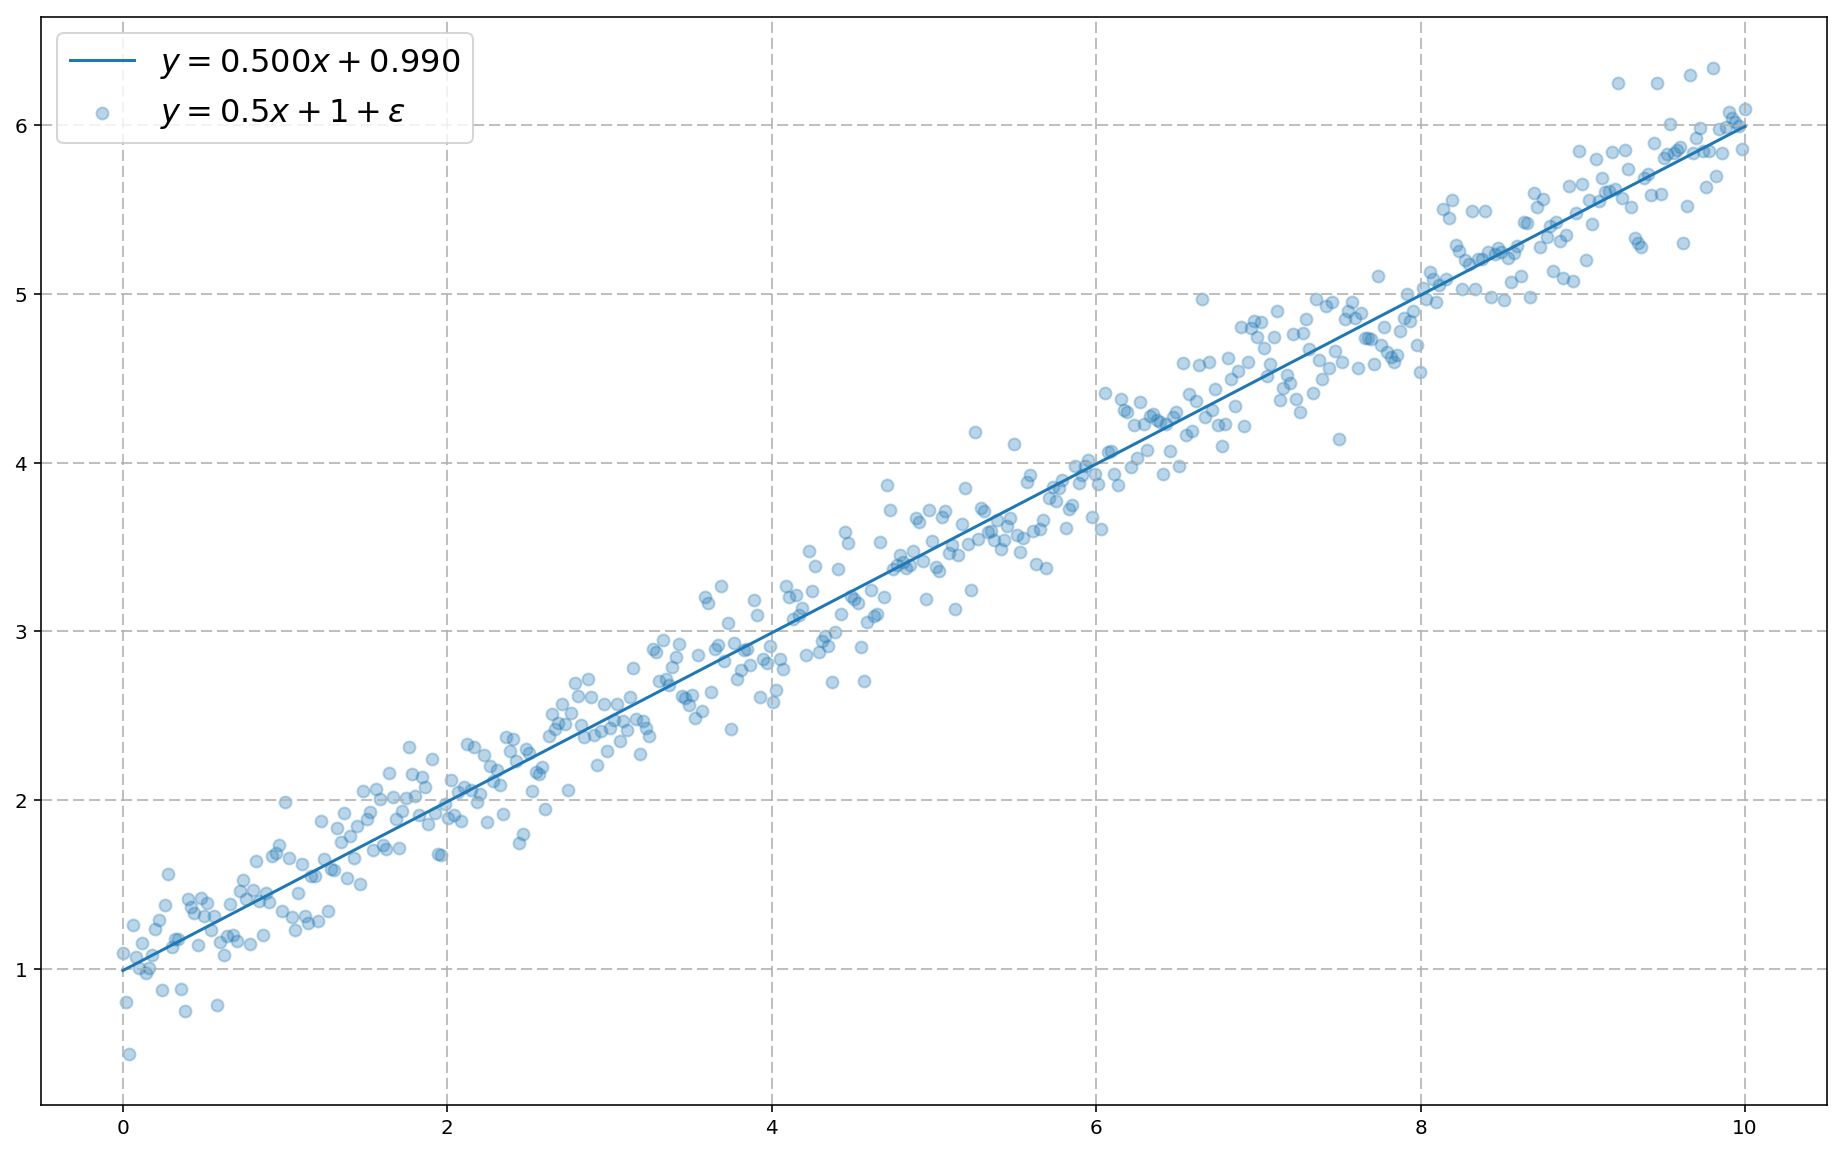

In [21]:
plt.grid(linestyle='--')
plt.scatter(x, y, alpha=0.3, label='$y=0.5x+1+\epsilon$')
plt.plot(x, k * x + b, label=f'$y={k:.3f}x+{b:.3f}$')
plt.legend(fontsize=16)
plt.show()

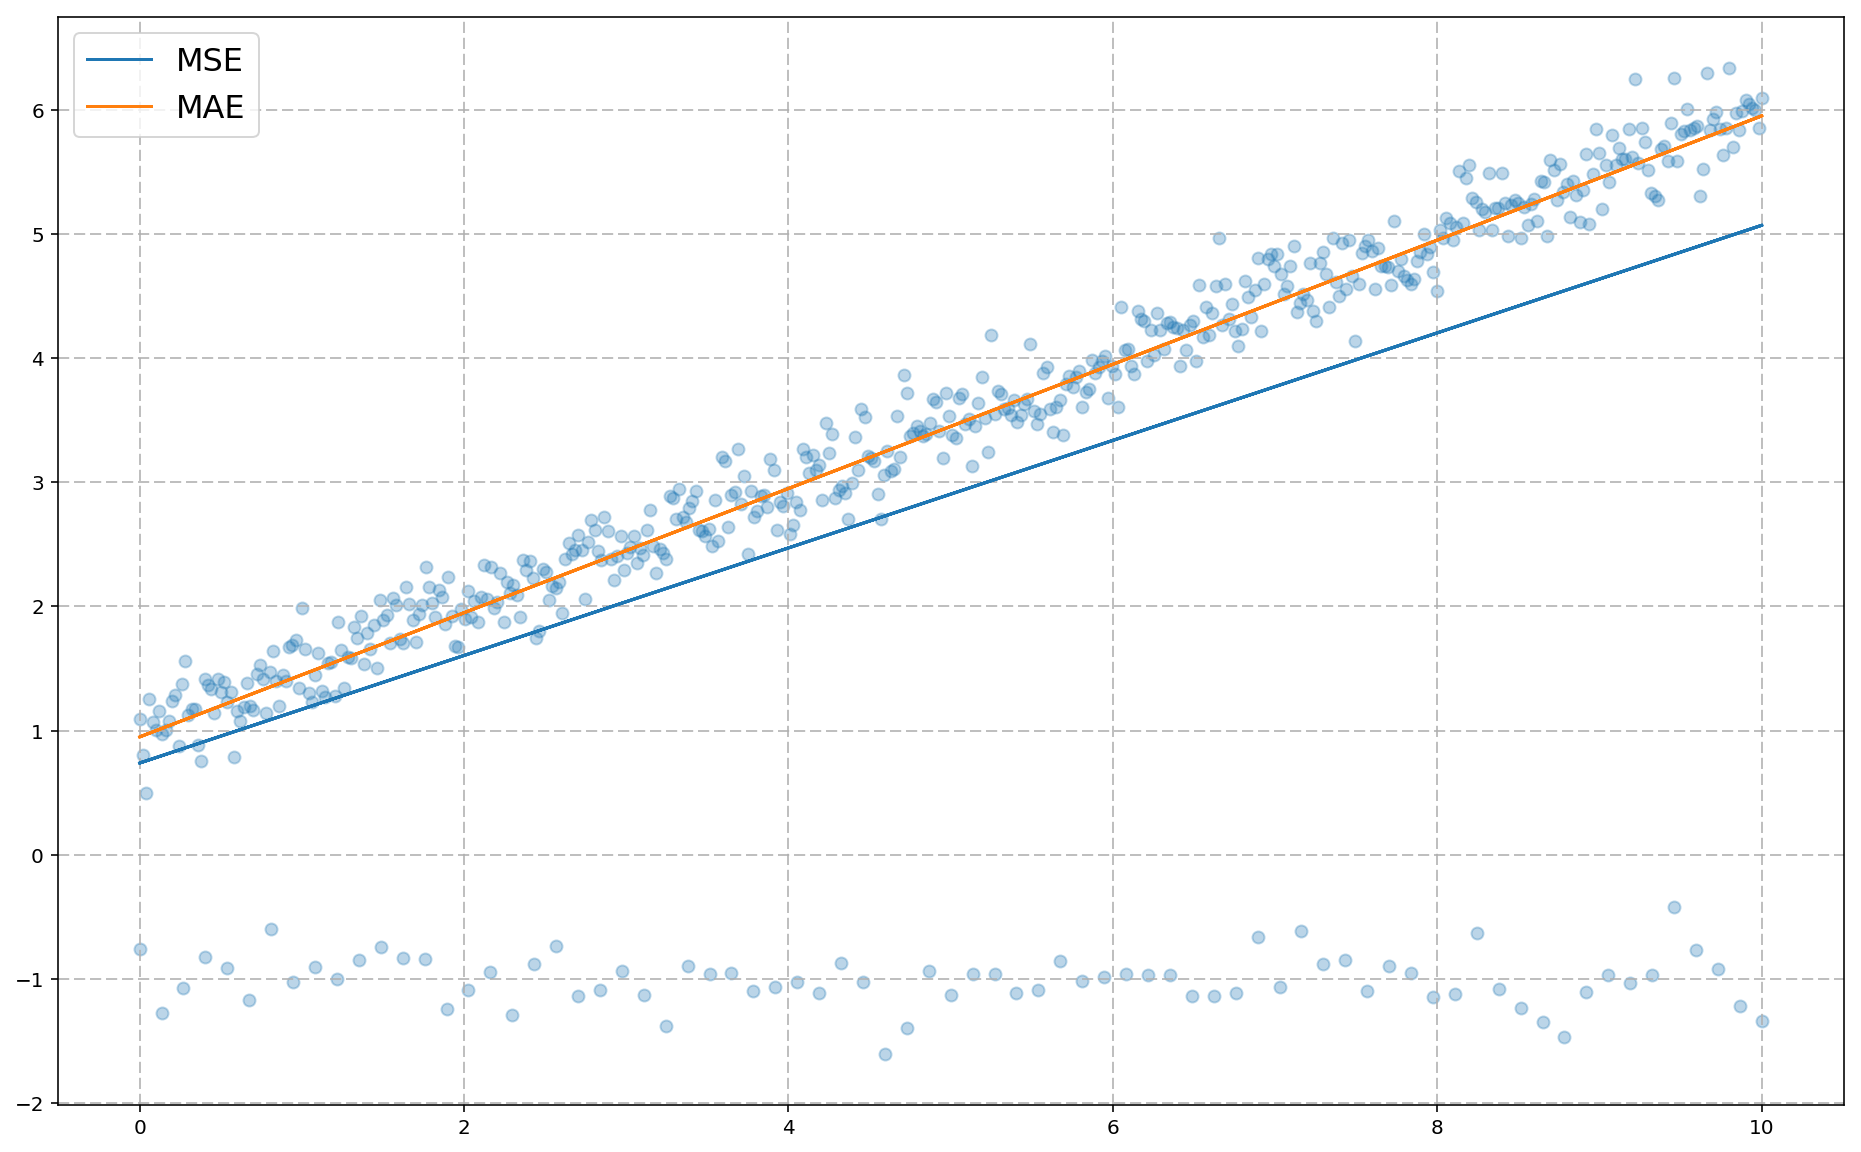

In [28]:
x_outliers = np.linspace(0, 10, num=75)
y_outliers = -1 + np.random.normal(0, 0.2, size=75)
x_new = np.append(x, x_outliers)
y_new = np.append(y, y_outliers)

k_mse, b_mse = optimize.minimize(mse, [0, 0], args=(x_new, y_new)).x

def mae(kb, x, y):
    k, b = kb
    y_pred = k * x + b
    return np.abs(y_pred - y).mean()

k_mae, b_mae = optimize.minimize(mae, [0, 0], args=(x_new, y_new)).x

plt.figure(figsize=(16, 10))
plt.grid(linestyle='--')
plt.scatter(x_new, y_new, alpha=0.3)
plt.plot(x_new, k_mse * x_new + b_mse, label='MSE')
plt.plot(x_new, k_mae * x_new + b_mae, label='MAE')
plt.legend(fontsize=16)
plt.show()

Как известно, MAE более устойчив к выбросам, что мы и видим.